In [16]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [17]:
df = pd.read_csv("../data/selected_M_best100.csv")
df = df.drop_duplicates()
print(df.head())

   ILMN_1651296  ILMN_1654609  ILMN_1655864  ILMN_1656111  ILMN_1657898  \
0        9.3790       13.1600        9.1206       13.0567        8.9263   
1        9.3431       13.6183        9.6620       13.4208        8.6274   
2        8.7567       12.5893        8.9047       11.5663        8.3385   
3        8.7806       12.4219        8.7785       11.7575        8.2053   
4        8.5279       12.0954        8.4493       11.7753        8.2168   

   ILMN_1660357  ILMN_1660938  ILMN_1663416  ILMN_1663975  ILMN_1664861  ...  \
0        9.5279        9.2688       16.3292        8.6046        9.4549  ...   
1        9.5668        9.5245       16.4771        8.7923        9.5092  ...   
2        8.6186        8.7190       15.2230        8.3046        8.6895  ...   
3        8.4064        8.6284       15.1578        8.4242        8.5277  ...   
4        8.4192        8.4568       14.9286        8.1800        8.3119  ...   

   ILMN_2159384  ILMN_2203891  ILMN_2203896  ILMN_2245676  ILMN_2272

In [18]:
def map_results(inpt):
    if inpt == 'control':
        return 0;

    else:
        return 1;

In [19]:
df['Results'] = df['Results'].apply(map_results)
print(df.head())

   ILMN_1651296  ILMN_1654609  ILMN_1655864  ILMN_1656111  ILMN_1657898  \
0        9.3790       13.1600        9.1206       13.0567        8.9263   
1        9.3431       13.6183        9.6620       13.4208        8.6274   
2        8.7567       12.5893        8.9047       11.5663        8.3385   
3        8.7806       12.4219        8.7785       11.7575        8.2053   
4        8.5279       12.0954        8.4493       11.7753        8.2168   

   ILMN_1660357  ILMN_1660938  ILMN_1663416  ILMN_1663975  ILMN_1664861  ...  \
0        9.5279        9.2688       16.3292        8.6046        9.4549  ...   
1        9.5668        9.5245       16.4771        8.7923        9.5092  ...   
2        8.6186        8.7190       15.2230        8.3046        8.6895  ...   
3        8.4064        8.6284       15.1578        8.4242        8.5277  ...   
4        8.4192        8.4568       14.9286        8.1800        8.3119  ...   

   ILMN_2159384  ILMN_2203891  ILMN_2203896  ILMN_2245676  ILMN_2272

In [20]:

df.describe()

,ILMN_1651296,ILMN_1654609,ILMN_1655864,ILMN_1656111,ILMN_1657898,ILMN_1660357,ILMN_1660938,ILMN_1663416,ILMN_1663975,ILMN_1664861,...,ILMN_2159384,ILMN_2203891,ILMN_2203896,ILMN_2245676,ILMN_2272857,ILMN_2320853,ILMN_2342250,ILMN_2359627,ILMN_2406410,Results
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,8.963658,12.634358,8.840350,11.874034,8.361906,8.984964,8.824249,15.757651,8.442949,8.970473,...,9.127508,9.202827,9.943714,9.048387,8.906776,13.466810,8.241331,8.425519,11.200771,0.707143
std,0.507967,0.787855,0.551345,0.896543,0.348476,0.548652,0.428465,0.639390,0.312019,0.847736,...,0.610215,0.657520,0.937709,0.499249,0.424639,0.757236,0.292743,0.383808,0.666722,0.456707
min,8.172100,9.570600,7.867800,8.669400,7.708100,8.049400,7.884700,12.853500,7.914500,7.722100,...,7.852400,8.306700,8.039000,7.992200,8.108100,10.752000,7.699200,7.761100,9.291300,0.000000
25%,8.595050,12.086050,8.413500,11.294975,8.128750,8.536025,8.474475,15.253375,8.202875,8.260800,...,8.679300,8.774550,9.309425,8.640600,8.607750,12.979300,8.026950,8.161925,10.811500,0.000000
50%,8.837400,12.694350,8.688850,11.907700,8.254400,8.911400,8.809150,16.006400,8.405250,8.777450,...,9.066750,9.008250,9.789650,9.046050,8.758050,13.661150,8.178500,8.335400,11.251850,1.000000
75%,9.262500,13.167725,9.193275,12.534300,8.539750,9.307150,9.102900,16.210800,8.635275,9.596200,...,9.559950,9.392600,10.440125,9.346525,9.234700,14.001500,8.414075,8.562700,11.645875,1.000000
max,10.410700,13.997800,10.372400,13.481200,9.626600,10.658800,9.881100,16.639100,9.186400,10.767600,...,10.433700,11.892100,13.061800,10.197800,10.149800,14.683300,9.326000,9.909400,12.640700,1.000000


In [21]:
df_features = list(df.columns)
print(df_features)
print(len(df.columns))

['ILMN_1651296', 'ILMN_1654609', 'ILMN_1655864', 'ILMN_1656111', 'ILMN_1657898', 'ILMN_1660357', 'ILMN_1660938', 'ILMN_1663416', 'ILMN_1663975', 'ILMN_1664861', 'ILMN_1667500', 'ILMN_1668535', 'ILMN_1670218', 'ILMN_1670638', 'ILMN_1670817', 'ILMN_1671005', 'ILMN_1671067', 'ILMN_1672295', 'ILMN_1674661', 'ILMN_1677756', 'ILMN_1679045', 'ILMN_1680139', 'ILMN_1687526', 'ILMN_1687884', 'ILMN_1689400', 'ILMN_1691860', 'ILMN_1692169', 'ILMN_1693635', 'ILMN_1694671', 'ILMN_1695382', 'ILMN_1698404', 'ILMN_1701962', 'ILMN_1702691', 'ILMN_1704014', 'ILMN_1704335', 'ILMN_1706859', 'ILMN_1707339', 'ILMN_1707631', 'ILMN_1713189', 'ILMN_1713764', 'ILMN_1715771', 'ILMN_1717229', 'ILMN_1718977', 'ILMN_1725707', 'ILMN_1729832', 'ILMN_1732141', 'ILMN_1733998', 'ILMN_1734410', 'ILMN_1738116', 'ILMN_1740875', 'ILMN_1743204', 'ILMN_1745788', 'ILMN_1755643', 'ILMN_1755911', 'ILMN_1756937', 'ILMN_1758687', 'ILMN_1760280', 'ILMN_1762080', 'ILMN_1763364', 'ILMN_1765725', 'ILMN_1767168', 'ILMN_1768391', 'ILMN_1

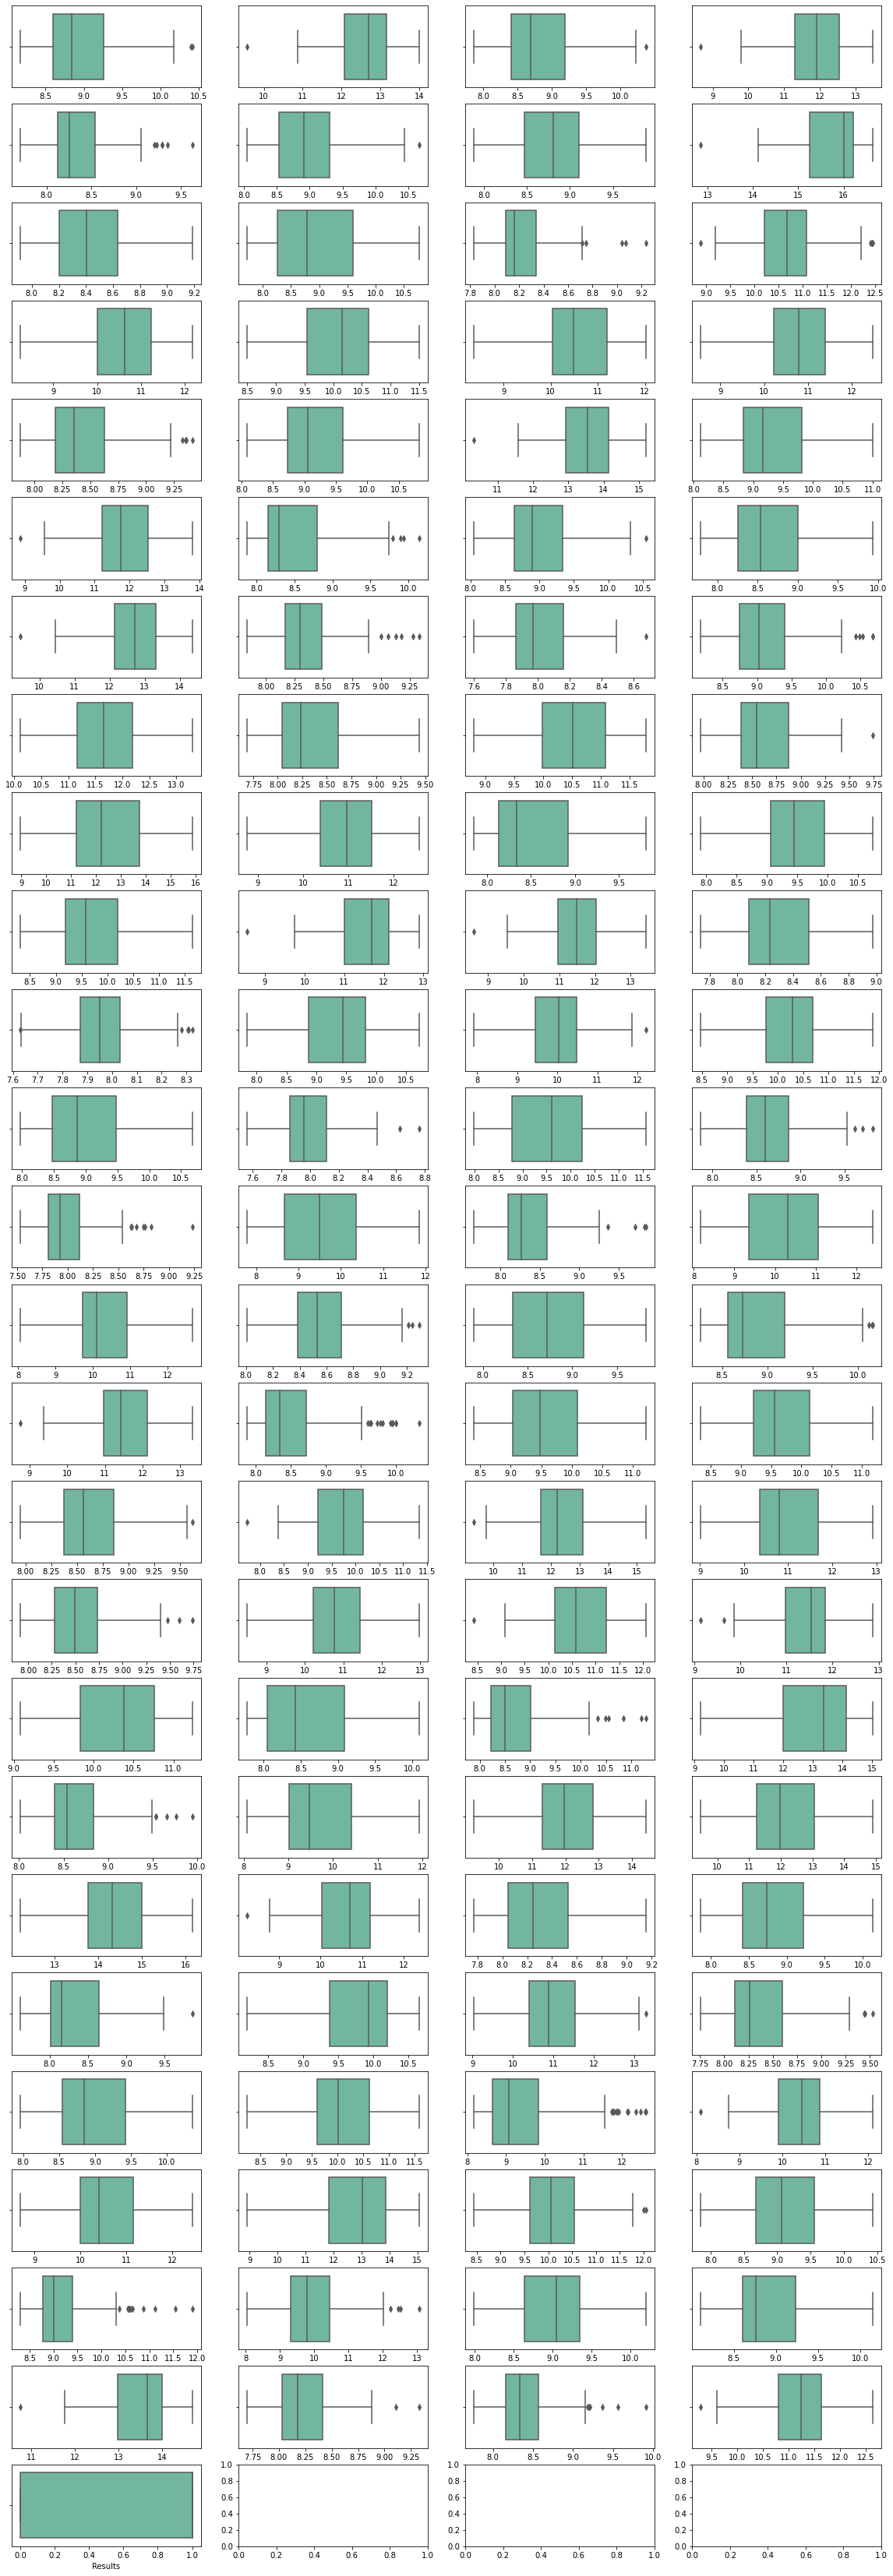

In [22]:
fig, axes = plt.subplots(26,4, figsize=(20,60))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    elif i == 11: 
        x_ = 3
        y_ = 0
    elif i == 15:
        x_ = 4
        y_ = 0
    elif i == 19:
        x_ = 5
        y_ = 0
    elif i == 23:
        x_ = 6
        y_ = 0 
    elif i == 27:
        x_ = 7
        y_ = 0
    elif i == 31: 
        x_ = 8
        y_ = 0
    elif i == 35:
        x_ = 9
        y_ = 0
    elif i == 39: 
        x_ = 10
        y_ = 0
    elif i == 43:
        x_ = 11
        y_ = 0
    elif i == 47:
        x_ = 12
        y_ = 0
    elif i == 51: 
        x_ = 13
        y_ = 0
    elif i == 55:
        x_ = 14
        y_ = 0
    elif i == 59: 
        x_ = 15
        y_ = 0
    elif i == 63:
        x_ = 16
        y_ = 0
    elif i == 67:
        x_ = 17
        y_ = 0
    elif i == 71:
        x_ = 18
        y_ = 0 
    elif i == 75:
        x_ = 19
        y_ = 0
    elif i == 79: 
        x_ = 20
        y_ = 0
    elif i == 83:
        x_ = 21
        y_ = 0
    elif i == 87: 
        x_ = 22
        y_ = 0
    elif i == 91:
        x_ = 23
        y_ = 0
    elif i == 95:
        x_ = 24
        y_ = 0
    elif i == 99:
        x_ = 25
        y_ = 0
    else:
        y_ += 1

In [23]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['ILMN_1651296', 'ILMN_1654609', 'ILMN_1655864', 'ILMN_1656111',
       'ILMN_1657898', 'ILMN_1660357', 'ILMN_1660938', 'ILMN_1663416',
       'ILMN_1663975', 'ILMN_1664861',
       ...
       'ILMN_2159384', 'ILMN_2203891', 'ILMN_2203896', 'ILMN_2245676',
       'ILMN_2272857', 'ILMN_2320853', 'ILMN_2342250', 'ILMN_2359627',
       'ILMN_2406410', 'Results'],
      dtype='object', length=101)
   ILMN_1651296  ILMN_1654609  ILMN_1655864  ILMN_1656111  ILMN_1657898  \
0      0.539132      0.810761      0.500200      0.911779      0.634975   
1      0.523095      0.914280      0.716362      0.987448      0.479176   
2      0.261145      0.681853      0.413998      0.602041      0.328590   
3      0.271822      0.644041      0.363611      0.641776      0.259161   
4      0.158939      0.570293      0.232173      0.645476      0.265155   

   ILMN_1660357  ILMN_1660938  ILMN_1663416  ILMN_1663975  ILMN_1664861  ...  \
0      0.566605      0.693298      0.918137      0.542574      0.5

In [24]:
x = df_02.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

1    99
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 99.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

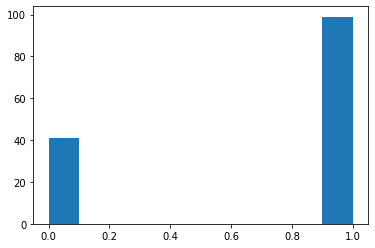

In [25]:
plt.hist(y)

1    58
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

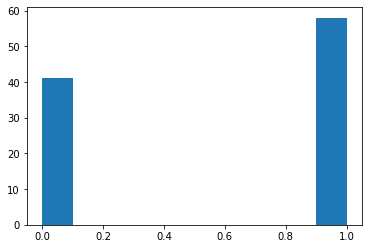

In [26]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.7)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0    58
1    58
Name: Results, dtype: int64


(array([58.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

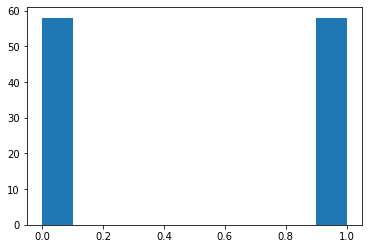

In [27]:
smt = SMOTE()
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [28]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  84.483
Standed deviation :  5.172
CV value :  3
Parameters :  {}
Accuracy :  88.776
Standed deviation :  4.405
CV value :  4
Parameters :  {}
Accuracy :  87.931
Standed deviation :  7.109
CV value :  5
Parameters :  {}
Accuracy :  91.377
Standed deviation :  5.502


In [29]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 1}
Accuracy :  85.345
Standed deviation :  4.310
CV value :  3
Parameters :  {'random_state': 0}
Accuracy :  93.095
Standed deviation :  3.217
CV value :  4
Parameters :  {'random_state': 2}
Accuracy :  92.241
Standed deviation :  2.859
CV value :  5
Parameters :  {'random_state': 0}
Accuracy :  93.080
Standed deviation :  4.456


In [30]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 5}
Accuracy :  93.966
Standed deviation :  2.586
CV value :  3
Parameters :  {'n_neighbors': 11}
Accuracy :  94.804
Standed deviation :  2.177
CV value :  4
Parameters :  {'n_neighbors': 7}
Accuracy :  93.103
Standed deviation :  4.877
CV value :  5
Parameters :  {'n_neighbors': 7}
Accuracy :  93.913
Standed deviation :  4.434


In [31]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  88.793
Standed deviation :  6.034
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  90.486
Standed deviation :  3.320
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  88.793
Standed deviation :  6.156
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  89.601
Standed deviation :  5.260


In [32]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  90.517
Standed deviation :  4.310
CV value :  3
Parameters :  {}
Accuracy :  90.463
Standed deviation :  5.423
CV value :  4
Parameters :  {}
Accuracy :  89.655
Standed deviation :  6.897
CV value :  5
Parameters :  {}
Accuracy :  89.601
Standed deviation :  7.610


In [33]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'linear'}
Accuracy :  91.379
Standed deviation :  5.172
CV value :  3
Parameters :  {'kernel': 'poly'}
Accuracy :  93.972
Standed deviation :  3.187
CV value :  4
Parameters :  {'kernel': 'poly'}
Accuracy :  93.966
Standed deviation :  2.859
CV value :  5
Parameters :  {'kernel': 'linear'}
Accuracy :  94.783
Standed deviation :  5.070


In [34]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 90, 'max_features': 2, 'n_estimators': 100}
Accuracy :  93.103
Standed deviation :  3.448
CV value :  3
Parameters :  {'max_depth': 150, 'max_features': 3, 'n_estimators': 100}
Accuracy :  96.536
Standed deviation :  2.450
CV value :  4
Parameters :  {'max_depth': 110, 'max_features': 2, 'n_estimators': 100}
Accuracy :  95.690
Standed deviation :  3.758
CV value :  5
Parameters :  {'max_depth': 150, 'max_features': 2, 'n_estimators': 100}
Accuracy :  95.652
Standed deviation :  2.750
